In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

import datetime

# importing wrangle/acquire module
import wrangle
from wrangle import get_zillow_dataset, \
                    null_df, \
                    drop_nulls, \
                    clean_zillow_dataset, \
                    train_validate_test_split

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# sklearn data science library
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# data acquisition and preparation

df = get_zillow_dataset()
print(df.shape)

(52319, 68)


In [3]:
# initial clean of dataset 
# where: feature and record null % > 80% are dropped

df = clean_zillow_dataset(df)
df.head()

dataframe shape: (52238, 16)


,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,transaction_date,year_built
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,2017-01-01,1998.00
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,2017-01-01,1967.00
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,2017-01-01,1962.00
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,2017-01-01,1970.00
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,2017-01-01,1950.00


In [4]:
# calculating and adding age of the home thru 2017

df = wrangle.age_of_homes(df)
df.head()

,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,transaction_date,year_built,home_age
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,2017-01-01,1998.00,19.00
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,2017-01-01,1967.00,50.00
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,2017-01-01,1962.00,55.00
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,2017-01-01,1970.00,47.00
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,2017-01-01,1950.00,67.00


In [5]:
# adding transactions by month columns

df = wrangle.clean_months(df)
df.head()

,bathroom_count,bedroom_count,living_sq_feet,county_by_fips,land_assessed_value,latitude,logerror,longitude,property_sq_feet,county_zoning_code,blockgroup_assignment,home_assessed_value,taxamount,home_value,year_built,home_age,transaction_month
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,485713.00,11013.72,1023282.00,1998.00,19.00,January
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,61110010.02,88000.00,5672.48,464000.00,1967.00,50.00,January
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,1962.00,55.00,January
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,1970.00,47.00,January
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,63000.00,0101,60374608.00,276684.00,9516.26,773303.00,1950.00,67.00,January


In [6]:
# df['example1'] = pd.to_datetime(df.transaction_date).dt.to_period('m')
# df['example1'].head()

In [7]:
# df['example2'] = pd.to_datetime(df.transaction_date).dt.strftime('%m/%Y')
# df.example2.head()

In [8]:
# dataframe info

sorted_cols = df.columns.sort_values()
df[sorted_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52238 entries, 0 to 52318
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathroom_count         52238 non-null  float64
 1   bedroom_count          52238 non-null  float64
 2   blockgroup_assignment  52238 non-null  float64
 3   county_by_fips         52238 non-null  object 
 4   county_zoning_code     52238 non-null  object 
 5   home_age               52200 non-null  float64
 6   home_assessed_value    52166 non-null  float64
 7   home_value             52237 non-null  float64
 8   land_assessed_value    52237 non-null  float64
 9   latitude               52238 non-null  float64
 10  living_sq_feet         52238 non-null  float64
 11  logerror               52238 non-null  float64
 12  longitude              52238 non-null  float64
 13  property_sq_feet       51881 non-null  float64
 14  taxamount              52234 non-null  float64
 15  tr

In [9]:
# checking initial dataset nulls and percentage of dataframe features

remaining_nulls = null_df(df)
remaining_nulls

,Total Null,Feature Null %
property_sq_feet,357,0.01
home_assessed_value,72,0.00
home_age,38,0.00
year_built,38,0.00
taxamount,4,0.00
land_assessed_value,1,0.00
home_value,1,0.00
county_zoning_code,0,0.00
blockgroup_assignment,0,0.00
bathroom_count,0,0.00


In [10]:
# summing total number of outliers per continuous feature - target variable

wrangle.sum_outliers(df)

,Feature,Upper_Bound,Total Outliers
0,property_sq_feet,13591.00,5528
1,blockgroup_assignment,60915040.10,4372
2,home_assessed_value,449560.25,3882
3,taxamount,14441.20,3782
4,home_value,1256382.50,3507
5,land_assessed_value,906302.00,2996
6,living_sq_feet,3863.00,2272
7,bathroom_count,4.50,1577
8,bedroom_count,5.50,777
9,home_age,110.50,240


In [11]:
# identifying continuous variables/features:

num_lst = df.select_dtypes("number").columns.tolist()
num_lst = [ele for ele in num_lst if ele not in ("logerror", "year_built")]
num_lst

['bathroom_count',
 'bedroom_count',
 'living_sq_feet',
 'land_assessed_value',
 'latitude',
 'longitude',
 'property_sq_feet',
 'blockgroup_assignment',
 'home_assessed_value',
 'taxamount',
 'home_value',
 'home_age']

In [12]:
# check the df shape before handling outliers

df.shape

(52238, 17)

In [13]:
# let's handle the outliers using a upper bound "capping" method

df = wrangle.capp_outliers(df, num_lst)
df.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,logerror,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month
0,3.50,4.00,3100.00,Orange County,537569.00,33634931.00,0.03,-117869207.00,4506.00,122,60590630.07,449560.25,11013.72,1023282.00,1998.00,19.00,January
1,1.00,2.00,1465.00,Ventura County,376000.00,34449266.00,0.06,-119281531.00,12647.00,1110,60915040.10,88000.00,5672.48,464000.00,1967.00,50.00,January
2,2.00,3.00,1243.00,Orange County,479489.00,33886168.00,0.01,-117823170.00,8432.00,122,60590218.02,85289.00,6488.30,564778.00,1962.00,55.00,January
3,3.00,4.00,2376.00,LA County,36225.00,34245180.00,-0.10,-118240722.00,13038.00,0101,60373001.00,108918.00,1777.51,145143.00,1970.00,47.00,January
4,3.00,4.00,2962.00,LA County,496619.00,34145202.00,-0.00,-118179824.00,13591.00,0101,60374608.00,276684.00,9516.26,773303.00,1950.00,67.00,January


In [14]:
# checking the dataframe shape after capping outliers

df.shape

(52238, 17)

----
### **``splitting zillow dataset and cleaning remaining nulls/missing values``**

In [15]:
# splitting the dataset to 1. fill-in remaining nulls and 2. determine outlier cutoffs

train, validate, test = train_validate_test_split(df)

train shape: (29253, 17)
validate shape: (12537, 17)
test shape: (10448, 17)


In [16]:
# 2nd split: splitting larger datasets into x and y variables

X_train = train.drop(columns = "logerror")
y_train = train['logerror']

X_validate = validate.drop(columns = "logerror")
y_validate = validate['logerror']

X_test = test.drop(columns = "logerror")
y_test = test['logerror']

In [17]:
# checking train dataset for remaining nulls

null_df = null_df(X_train)
null_df

,Total Null,Feature Null %
property_sq_feet-capped,208,0.01
home_assessed_value-capped,40,0.00
year_built,21,0.00
home_age-capped,21,0.00
taxamount-capped,3,0.00
land_assessed_value-capped,1,0.00
home_value-capped,1,0.00
bathroom_count-capped,0,0.00
bedroom_count-capped,0,0.00
living_sq_feet-capped,0,0.00


In [18]:
# checking dataframe after split

X_train.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August


In [19]:
# classifying features/varibles by data type (discrete/continuous)
num_lst = []

for col in X_train.select_dtypes("number"):
        num_lst.append(col)

# creating the "thing"
impute_it = IterativeImputer(
    missing_values = np.nan, \
    skip_complete = True, \
    random_state = 123)

imputer = IterativeImputer(
        missing_values = np.nan, \
        skip_complete = True, \
        random_state = 123)

imputed = imputer.fit_transform(X_train[num_lst])
X_train_imputed = pd.DataFrame(imputed, index = X_train.index)

X_train[num_lst] = X_train_imputed
X_train.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August


In [20]:
# checking for null in train dataset

X_train.isnull().sum() # 21 missing home_age-binned after outlier capp

bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
longitude-capped                0
property_sq_feet-capped         0
county_zoning_code              0
blockgroup_assignment-capped    0
home_assessed_value-capped      0
taxamount-capped                0
home_value-capped               0
year_built                      0
home_age-capped                 0
transaction_month               0
dtype: int64

In [21]:
# using imputer on validate and test datasets

val_imputed = imputer.transform(X_validate[num_lst])
X_validate_imputed = pd.DataFrame(val_imputed, index = X_validate.index)
X_validate[num_lst] = X_validate_imputed

test_imputed = imputer.transform(X_test[num_lst])
X_test_imputed = pd.DataFrame(test_imputed, index = X_test.index)
X_test[num_lst] = X_test_imputed

# checking the dataset for nulls

print('null results in: X_validate')
print('----------------------------|---------')
print(f'{X_validate.isnull().sum()}')
print()
print('null results in: X_test')
print('----------------------------|---------')
print(f'{X_test.isnull().sum()}')

null results in: X_validate
----------------------------|---------
bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
longitude-capped                0
property_sq_feet-capped         0
county_zoning_code              0
blockgroup_assignment-capped    0
home_assessed_value-capped      0
taxamount-capped                0
home_value-capped               0
year_built                      0
home_age-capped                 0
transaction_month               0
dtype: int64

null results in: X_test
----------------------------|---------
bathroom_count-capped           0
bedroom_count-capped            0
living_sq_feet-capped           0
county_by_fips                  0
land_assessed_value-capped      0
latitude-capped                 0
longitude-capped                0
property_sq_feet-capped         0
county_zoning_code              0
blockg

In [22]:
# pandas cut method on Home Age
# [(0.999, 38.0] < (38.0, 57.0] < (57.0, 67.0] < (67.0, 110.5]]

age_labels = ["new-century", "mid-20th-century", "early-20th-century", "late-19th-century"]

X_train["home_age-binned"] = pd.qcut(
    X_train["home_age-capped"], \
    q = 4, \
    labels = age_labels)

X_validate["home_age-binned"] = pd.qcut(
    X_validate["home_age-capped"], \
    q = 4, \
    labels = age_labels)

X_test["home_age-binned"] = pd.qcut(
    X_validate["home_age-capped"], \
    q = 4, \
    labels = age_labels)

X_train.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February,early-20th-century
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August,late-19th-century
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April,mid-20th-century
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January,early-20th-century
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August,early-20th-century


In [24]:
# pandas cut method on Living Sq. Feet
# [(127.999, 1267.0] < (1267.0, 1654.0] < (1654.0, 2299.0] < (2299.0, 3863.0]]

sq_ft_labels = ["128_to_1267_sqfeet", "1267_to_1654_sqfeet", "1654_to_2299_sqfeet", "2299_to_3863_sqfeet"]

X_train["living_sqfeet-binned"] = pd.qcut(
    X_train["living_sq_feet-capped"], \
    q = 4, \
    labels = age_labels)

X_validate["living_sqfeet-binned"] = pd.qcut(
    X_validate["living_sq_feet-capped"], \
    q = 4, \
    labels = age_labels)

X_test["living_sqfeet-binned"] = pd.qcut(
    X_validate["living_sq_feet-capped"], \
    q = 4, \
    labels = age_labels)

X_train.head()

,bathroom_count-capped,bedroom_count-capped,living_sq_feet-capped,county_by_fips,land_assessed_value-capped,latitude-capped,longitude-capped,property_sq_feet-capped,county_zoning_code,blockgroup_assignment-capped,home_assessed_value-capped,taxamount-capped,home_value-capped,year_built,home_age-capped,transaction_month,home_age-binned,living_sqfeet-binned
7961,3.00,3.00,1903.00,LA County,715657.00,34204513.00,-118131241.00,10704.00,0100,60374602.00,196647.00,10691.12,912304.00,1957.00,60.00,February,early-20th-century,early-20th-century
47936,3.00,4.00,2108.00,LA County,862962.00,34147955.00,-118350425.00,8432.00,0100,60371431.00,449560.25,14441.20,1256382.50,1935.00,82.00,August,late-19th-century,early-20th-century
20730,4.00,4.00,2446.00,LA County,432406.00,34135818.00,-118407312.00,9568.00,0100,60371439.01,418119.00,10333.34,850525.00,1962.00,55.00,April,mid-20th-century,late-19th-century
1988,1.00,3.00,1120.00,LA County,408600.00,33893976.00,-118334891.00,5250.00,0101,60376037.02,101400.00,6387.31,510000.00,1953.00,64.00,January,early-20th-century,new-century
45959,2.00,3.00,1918.00,LA County,193425.00,33910440.00,-118013069.00,7936.00,0100,60375040.01,149747.00,4519.94,343172.00,1958.00,59.00,August,early-20th-century,early-20th-century


In [ ]:
# listing discrete/categorical and continuous features

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

disc_features = []
num_features = []

for col in list(X_train.columns):
    if is_numeric_dtype(X_train[col]):
        num_features.append(col)
    
    else: disc_features.append(col)

print(f'discrete feature:\n{disc_features}')
print('-------')
print(f'continuous feature:\n{num_features}')

discrete feature:
['county_by_fips', 'county_zoning_code', 'home_age-binned', 'home_sq_feet-binned', 'transaction_month']
-------
continuous feature:
['bathroom_count-capped', 'bedroom_count-capped', 'living_sq_feet-capped', 'land_assessed_value-capped', 'latitude-capped', 'longitude-capped', 'property_sq_feet-capped', 'blockgroup_assignment-capped', 'home_assessed_value-capped', 'taxamount-capped', 'home_value-capped', 'year_built', 'home_age-capped']


-----
### **``hypothesis testing``**

In [ ]:
# description of continuous variables

summary_stats = X_train.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

,count,mean,std,min,25%,50%,75%,max,range
bathroom_count-capped,29253.00,2.27,0.90,0.00,2.00,2.00,3.00,4.50,4.50
bedroom_count-capped,29253.00,3.30,0.91,0.00,3.00,3.00,4.00,5.50,5.50
blockgroup_assignment-capped,29253.00,60476853.37,162139.57,60371011.10,60374010.01,60376033.01,60590423.15,60915040.10,544029.00
home_age-capped,29253.00,53.67,23.04,1.00,38.00,57.00,67.00,110.50,109.50
home_assessed_value-capped,29253.00,167908.23,121322.75,-25858.26,77037.00,130847.00,225228.00,449560.25,475418.51
home_value-capped,29253.00,452366.57,337962.67,1000.00,191402.00,372401.00,613737.00,1256382.50,1255382.50
land_assessed_value-capped,29253.00,282071.35,249072.39,161.00,74769.00,217633.00,405200.00,906302.00,906141.00
latitude-capped,29253.00,34025699.41,273878.54,33340620.00,33830415.00,34028312.00,34188344.00,34727747.88,1387127.88
living_sq_feet-capped,29253.00,1866.62,800.69,128.00,1267.00,1654.00,2299.00,3863.00,3735.00
longitude-capped,29253.00,-118195672.95,355547.71,-119475416.00,-118401541.00,-118155208.00,-117932621.00,-117557472.00,1917944.00


In [ ]:
# let's explore discrete vs. continuous variables/features

for col in list(X_train.columns):
    print(f'Feature: {col}')
    print(f'data type: {X_train[col].dtype}')
    print(f'number of unique values: {X_train[col].nunique()}')
    print()

Feature: bathroom_count-capped
data type: float64
number of unique values: 9

Feature: bedroom_count-capped
data type: float64
number of unique values: 7

Feature: living_sq_feet-capped
data type: float64
number of unique values: 3148

Feature: county_by_fips
data type: object
number of unique values: 3

Feature: land_assessed_value-capped
data type: float64
number of unique values: 20835

Feature: latitude-capped
data type: float64
number of unique values: 28595

Feature: longitude-capped
data type: float64
number of unique values: 28740

Feature: property_sq_feet-capped
data type: float64
number of unique values: 8184

Feature: county_zoning_code
data type: object
number of unique values: 21

Feature: blockgroup_assignment-capped
data type: float64
number of unique values: 19235

Feature: home_assessed_value-capped
data type: float64
number of unique values: 20767

Feature: taxamount-capped
data type: float64
number of unique values: 26697

Feature: home_value-capped
data type: float

In [ ]:
# what is block group assignment
X_train["blockgroup_assignment-capped"].head()

7961    60374602.00
47936   60371431.00
20730   60371439.01
1988    60376037.02
45959   60375040.01
Name: blockgroup_assignment-capped, dtype: float64

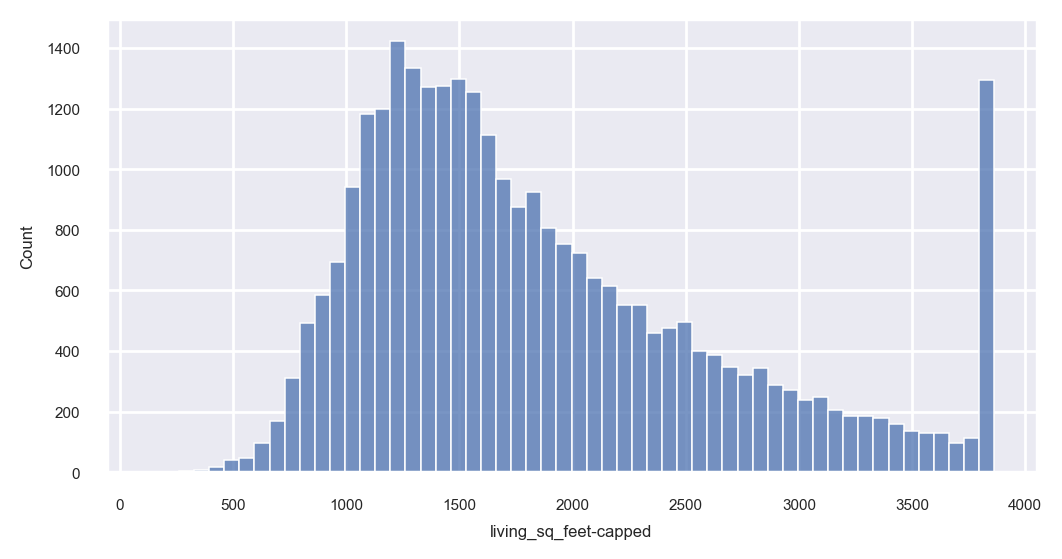

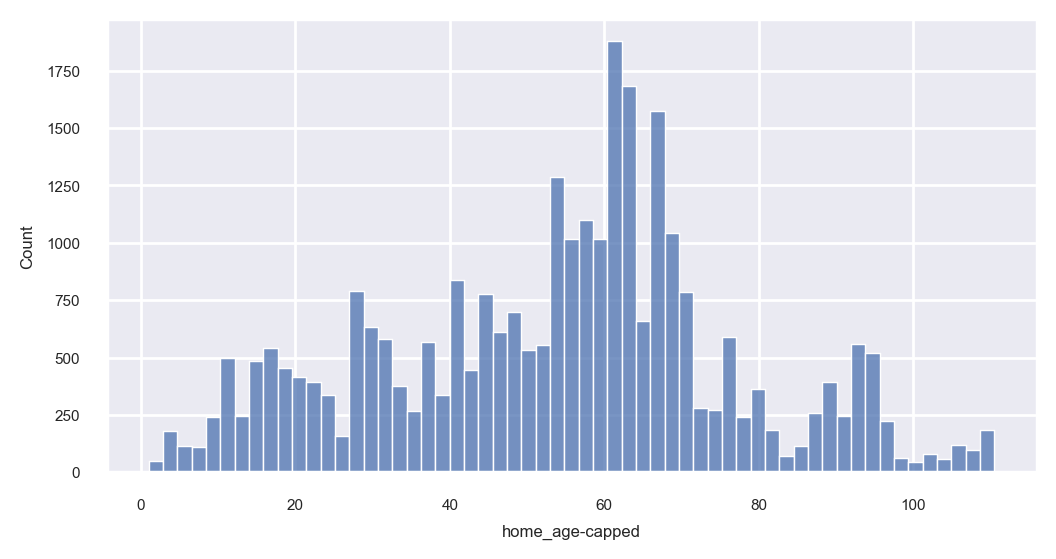

In [ ]:
# let's bin the following features:

# living sq. feet = relative size of the home (<1K, 1-2K, 2-3K, 4K, etc.)
# home age = relative age of the home (e.g., recent build, mid-century, early-century, last-century, etc.)

for col in X_train[["living_sq_feet-capped", "home_age-capped"]]:
    plt.figure(figsize = (6, 3))
    sns.set(font_scale = .5)
    
    sns.histplot(X_train[col])
    plt.show()


In [ ]:
# let's check the df information

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29253 entries, 7961 to 25621
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   bathroom_count-capped         29253 non-null  float64 
 1   bedroom_count-capped          29253 non-null  float64 
 2   living_sq_feet-capped         29253 non-null  float64 
 3   county_by_fips                29253 non-null  object  
 4   land_assessed_value-capped    29253 non-null  float64 
 5   latitude-capped               29253 non-null  float64 
 6   longitude-capped              29253 non-null  float64 
 7   property_sq_feet-capped       29253 non-null  float64 
 8   county_zoning_code            29253 non-null  object  
 9   blockgroup_assignment-capped  29253 non-null  float64 
 10  home_assessed_value-capped    29253 non-null  float64 
 11  taxamount-capped              29253 non-null  float64 
 12  home_value-capped             29253 non-nul

In [ ]:
# re-running feature lists

disc_features = []
num_features = []

for col in list(X_train.columns):
    if is_numeric_dtype(X_train[col]):
        num_features.append(col)
    
    else: disc_features.append(col)

print(f'discrete feature:\n{disc_features}')
print('-------')
print(f'continuous feature:\n{num_features}')

discrete feature:
['county_by_fips', 'county_zoning_code', 'home_age-binned', 'home_sq_feet-binned', 'transaction_month']
-------
continuous feature:
['bathroom_count-capped', 'bedroom_count-capped', 'living_sq_feet-capped', 'land_assessed_value-capped', 'latitude-capped', 'longitude-capped', 'property_sq_feet-capped', 'blockgroup_assignment-capped', 'home_assessed_value-capped', 'taxamount-capped', 'home_value-capped', 'year_built', 'home_age-capped']


In [ ]:
# Question Number #1:
# Is there a difference in log error across the three (3) counties?

county_lst = list(df["county_by_fips"].unique())

for ele in county_lst:
    print(f'County: {ele}')
    print(f'logerror: {round(df[df["county_by_fips"] == ele].logerror.var(), 4)}')
    print("-------------------")

County: Orange County
logerror: 0.0385
-------------------
County: Ventura County
logerror: 0.0244
-------------------
County: LA County
logerror: 0.029
-------------------
